In [1]:
import os
import librosa
import pandas as pd
import soundfile as sf
from tqdm.notebook import tqdm_notebook as tqdm

In [19]:
full_dataset = pd.DataFrame(columns=['path', 'sentence'])

In [20]:
#path_ljspeech = 'data/LJSpeech'
# path_tts_portuguese = 'data/TTS-Portuguese-Corpus'
path_custom_dataset = 'data/custom_dataset'

## TTS Portuguese Corpus

In [4]:
df_dataset_tts_portuguese = pd.read_csv(f'{path_custom_dataset}/texts.csv', header=None, sep='==') # Aqui vamos ler o arquivo de texto com o nome dos audios e suas descrições
df_dataset_tts_portuguese = df_dataset_tts_portuguese.rename(columns={0: 'path', 1: 'sentence'})
df_dataset_tts_portuguese

/tmp/ipykernel_25629/857569029.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_dataset_tts_portuguese = pd.read_csv(f'{path_tts_portuguese}/texts.csv', header=None, sep='==')


,path,sentence
0,wavs/sample-0.wav,O título de página solicitado contém carateres...
1,wavs/sample-1.wav,"O academicismo ou academismo designam, origina..."
2,wavs/sample-2.wav,Esse método estendeu sua influência sobre todo...
3,wavs/sample-3.wav,"No entanto, os termos não têm uma aplicação co..."
4,wavs/sample-5.wav,O sucesso da proposta francesa a tornou um mod...
...,...,...
3620,wavs/sample-6713.wav,"Tendo uma paixão pelo hip hop, a artista fico..."
3621,wavs/sample-6717.wav,As vendas digitais da faixa ultrapassaram a m...
3622,wavs/sample-6723.wav,O financiamento da ação externa da União Euro...
3623,wavs/sample-6727.wav,As avaliações económicas dos tratamentos atua...


In [5]:
df_dataset_tts_portuguese['path'] = f'{path_custom_dataset}/' + df_dataset_tts_portuguese["path"] # Aqui adicionamos o caminho para acessar os audios considerando a pasta do fork como raiz
df_dataset_tts_portuguese

,path,sentence
0,data/TTS-Portuguese-Corpus/wavs/sample-0.wav,O título de página solicitado contém carateres...
1,data/TTS-Portuguese-Corpus/wavs/sample-1.wav,"O academicismo ou academismo designam, origina..."
2,data/TTS-Portuguese-Corpus/wavs/sample-2.wav,Esse método estendeu sua influência sobre todo...
3,data/TTS-Portuguese-Corpus/wavs/sample-3.wav,"No entanto, os termos não têm uma aplicação co..."
4,data/TTS-Portuguese-Corpus/wavs/sample-5.wav,O sucesso da proposta francesa a tornou um mod...
...,...,...
3620,data/TTS-Portuguese-Corpus/wavs/sample-6713.wav,"Tendo uma paixão pelo hip hop, a artista fico..."
3621,data/TTS-Portuguese-Corpus/wavs/sample-6717.wav,As vendas digitais da faixa ultrapassaram a m...
3622,data/TTS-Portuguese-Corpus/wavs/sample-6723.wav,O financiamento da ação externa da União Euro...
3623,data/TTS-Portuguese-Corpus/wavs/sample-6727.wav,As avaliações económicas dos tratamentos atua...


In [6]:
full_dataset = pd.concat([full_dataset, df_dataset_tts_portuguese], ignore_index=True)
full_dataset

,path,sentence
0,data/TTS-Portuguese-Corpus/wavs/sample-0.wav,O título de página solicitado contém carateres...
1,data/TTS-Portuguese-Corpus/wavs/sample-1.wav,"O academicismo ou academismo designam, origina..."
2,data/TTS-Portuguese-Corpus/wavs/sample-2.wav,Esse método estendeu sua influência sobre todo...
3,data/TTS-Portuguese-Corpus/wavs/sample-3.wav,"No entanto, os termos não têm uma aplicação co..."
4,data/TTS-Portuguese-Corpus/wavs/sample-5.wav,O sucesso da proposta francesa a tornou um mod...
...,...,...
3620,data/TTS-Portuguese-Corpus/wavs/sample-6713.wav,"Tendo uma paixão pelo hip hop, a artista fico..."
3621,data/TTS-Portuguese-Corpus/wavs/sample-6717.wav,As vendas digitais da faixa ultrapassaram a m...
3622,data/TTS-Portuguese-Corpus/wavs/sample-6723.wav,O financiamento da ação externa da União Euro...
3623,data/TTS-Portuguese-Corpus/wavs/sample-6727.wav,As avaliações económicas dos tratamentos atua...


## Remove problemas no dataset

Printa os caminhos que não existe o arquivo (se não printar nada, significa que está tudo ok) e marca para serem removidos do dataset

In [25]:
for idx, path in enumerate(full_dataset['path']): # Aqui vamos verificar se temos a descrição mas não temos o audio
    if not os.path.exists(path):
        print(idx, path)
        full_dataset.loc[idx, 'sentence'] = None

Remove sentenças em branco

In [26]:
full_dataset[full_dataset['sentence'] == ''].count() # Aqui vamos verificar se temos o audio mas não temos sua descrição

path        0
sentence    0
dtype: int64

In [27]:
full_dataset[full_dataset['sentence'] == ''] = None
full_dataset = full_dataset.dropna(subset='sentence')
full_dataset

,path,sentence
0,data/custom_dataset/audio/0.wav,O linho estava em flor.
1,data/custom_dataset/audio/1.wav,"Com as mais lindas flores azuis, tão suaves e ..."
2,data/custom_dataset/audio/2.wav,quem sabe até mais.
3,data/custom_dataset/audio/3.wav,O sol brilhava sobre o linho e as nuvens de ch...
4,data/custom_dataset/audio/4.wav,era tão bom para ele quanto para as crianças p...
...,...,...
3785,data/custom_dataset/audio/3785.wav,"Assim, acabou morrendo ali mesmo, com o rosto ..."
3786,data/custom_dataset/audio/3786.wav,"Esse foi o castigo do belo Narciso, cujo desti..."
3787,data/custom_dataset/audio/3787.wav,"Eco ficou chorando ao lado do corpo dele, até ..."
3788,data/custom_dataset/audio/3788.wav,"Ao despertar, Eco viu que Narciso não estava m..."


## Salva dataset

Armazena em uma nova coluna o tempo de cada áudio

In [28]:
all_times = [] # Aqui vamos fazer uma analise dos audios coletando o tempo de duraçção
for path in tqdm(full_dataset['path']):
    all_times.append(librosa.get_duration(filename=path))
full_dataset['time'] = all_times

  0%|          | 0/3790 [00:00<?, ?it/s]

In [29]:
full_dataset

,path,sentence,time
0,data/custom_dataset/audio/0.wav,O linho estava em flor.,1.71
1,data/custom_dataset/audio/1.wav,"Com as mais lindas flores azuis, tão suaves e ...",5.31
2,data/custom_dataset/audio/2.wav,quem sabe até mais.,1.56
3,data/custom_dataset/audio/3.wav,O sol brilhava sobre o linho e as nuvens de ch...,4.08
4,data/custom_dataset/audio/4.wav,era tão bom para ele quanto para as crianças p...,6.51
...,...,...,...
3785,data/custom_dataset/audio/3785.wav,"Assim, acabou morrendo ali mesmo, com o rosto ...",6.36
3786,data/custom_dataset/audio/3786.wav,"Esse foi o castigo do belo Narciso, cujo desti...",6.36
3787,data/custom_dataset/audio/3787.wav,"Eco ficou chorando ao lado do corpo dele, até ...",5.49
3788,data/custom_dataset/audio/3788.wav,"Ao despertar, Eco viu que Narciso não estava m...",7.17


In [30]:
full_dataset.to_csv('data/dataset_custom.tsv', sep='\t', index=False) # Salva o dataset com a coluna 'time' que contem a informação de tempo de cada audio

# Limpar dataset

In [31]:
pd_dataset_dict = pd.read_csv('data/dataset_custom.tsv', sep='\t') # Aqui vamos ler o dataset com a coluna 'time'
pd_dataset_dict

,path,sentence,time
0,data/custom_dataset/audio/0.wav,O linho estava em flor.,1.71
1,data/custom_dataset/audio/1.wav,"Com as mais lindas flores azuis, tão suaves e ...",5.31
2,data/custom_dataset/audio/2.wav,quem sabe até mais.,1.56
3,data/custom_dataset/audio/3.wav,O sol brilhava sobre o linho e as nuvens de ch...,4.08
4,data/custom_dataset/audio/4.wav,era tão bom para ele quanto para as crianças p...,6.51
...,...,...,...
3785,data/custom_dataset/audio/3785.wav,"Assim, acabou morrendo ali mesmo, com o rosto ...",6.36
3786,data/custom_dataset/audio/3786.wav,"Esse foi o castigo do belo Narciso, cujo desti...",6.36
3787,data/custom_dataset/audio/3787.wav,"Eco ficou chorando ao lado do corpo dele, até ...",5.49
3788,data/custom_dataset/audio/3788.wav,"Ao despertar, Eco viu que Narciso não estava m...",7.17


## Remover áudios muito grande
Por mais que exista o parâmetro "max_input_length" no treinamento do código do Wav2Vec2, é interessante limpar o que não for utilizado, até porque ao fazer o preprocessing ele ocupa espaço em disco.

In [32]:
pd_dataset_dict['time'].sort_values()

630      0.60
235      0.72
2138     0.72
3040     0.72
2339     0.75
        ...  
1950    18.00
2228    18.03
1711    19.41
1722    19.71
3439    19.80
Name: time, Length: 3790, dtype: float64

In [33]:
ranges_time = [] # Separamos os ranges de tempo dos audios de 5 em 5 segundos para fazer o levantamento de durações
ranges_time.append(pd_dataset_dict['time'].between(0, 5, inclusive='left').sum())
ranges_time.append(pd_dataset_dict['time'].between(5, 10, inclusive='left').sum())
ranges_time.append(pd_dataset_dict['time'].between(10, 15, inclusive='left').sum())
ranges_time.append(pd_dataset_dict['time'].between(15, 20, inclusive='left').sum())
ranges_time.append(pd_dataset_dict['time'].between(20, 25, inclusive='left').sum())
ranges_time.append(pd_dataset_dict['time'].between(25, 30, inclusive='left').sum())
ranges_time.append((pd_dataset_dict['time'] >= 30).sum())

[Text(0, 0, '776'),
 Text(0, 0, '1169'),
 Text(0, 0, '933'),
 Text(0, 0, '452'),
 Text(0, 0, '189'),
 Text(0, 0, '75'),
 Text(0, 0, '30')]

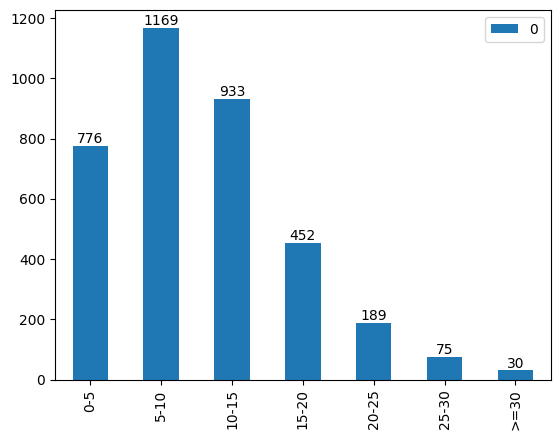

In [18]:
cat_time = pd.DataFrame(ranges_time, index=['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '>=30'])
ax = cat_time.plot.bar()
ax.bar_label(ax.containers[0])

Remover todos audios maior ou igual a 15 segundos

In [35]:
pd_dataset_dict.loc[pd_dataset_dict['time'] >= 15, 'sentence'] = None # Aqui vamos remover todos os aduiso com mais de 15 segundos do datasetfinal
pd_dataset_dict = pd_dataset_dict.dropna(subset='sentence')

In [39]:
pd_dataset_dict

,path,sentence,time
0,data/custom_dataset/audio/0.wav,O linho estava em flor.,1.71
1,data/custom_dataset/audio/1.wav,"Com as mais lindas flores azuis, tão suaves e ...",5.31
2,data/custom_dataset/audio/2.wav,quem sabe até mais.,1.56
3,data/custom_dataset/audio/3.wav,O sol brilhava sobre o linho e as nuvens de ch...,4.08
4,data/custom_dataset/audio/4.wav,era tão bom para ele quanto para as crianças p...,6.51
...,...,...,...
3785,data/custom_dataset/audio/3785.wav,"Assim, acabou morrendo ali mesmo, com o rosto ...",6.36
3786,data/custom_dataset/audio/3786.wav,"Esse foi o castigo do belo Narciso, cujo desti...",6.36
3787,data/custom_dataset/audio/3787.wav,"Eco ficou chorando ao lado do corpo dele, até ...",5.49
3788,data/custom_dataset/audio/3788.wav,"Ao despertar, Eco viu que Narciso não estava m...",7.17


In [40]:
pd_dataset_dict.to_csv('data/dataset_cleaned.tsv', sep='\t', index=False) # Salvamos o arquivo em disco com o dataset atualizado

# Seperar dataset para treinamento

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
pd_dataset = pd.read_csv('data/dataset_cleaned.tsv', sep='\t') # Aqui vamos carregar novamente o dataset para dropar a coluna de tempo e separar o dataset em treino e validação
pd_dataset = pd_dataset.drop(columns=['time'])

In [37]:
train, valid = train_test_split(pd_dataset, test_size=0.2, shuffle=True) # # Aqui separamos 80% dos audios para treinamento e 20% para validação
#valid, test = train_test_split(valid, test_size=0.5, shuffle=True)

In [38]:
print(len(train))
print(len(valid))
#print(len(test))

3020
756


In [39]:
# Criação dos aquivos de train e valid com base no que foi gerado
train.to_csv('data/train.csv', sep='|', index=False, header=False)
valid.to_csv('data/valid.csv', sep='|', index=False, header=False)
#test.to_csv('data/test.tsv', sep='|', index=False)

In [ ]:
#Todos os arquivos que forem gerados, seram colocados dentro da pasta 'data', criada com o proposito de acomodar os arquivos de dataset (data/custom_dataset')